# Table of Contents - 
## - 1) Import Libraries & Datasets
## - 2) PII Data
## - 3) Create Regional Variable
## - 4) Create Exclusion Flag
## - 5) Create Customer Profile
## - 6) Create Visual for Customer Profile
## - 7) Aggregates for Customer Profile
## - 8) Customer Profiles vs Regions & Departments
## - 9) Bar Charts - Customer Profiles vs Regions & Departments
## - 10) Export

# 1) Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sn
import scipy

In [2]:
# Import merged dataset

df=pd.read_pickle('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/02 Data/Prepared Data/05-12-2021 - customers_opm.pkl')

In [3]:
df.head()

,user_id,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,avg_spending_price,spending_flag,median_dspo,frequency_flag
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,120,16,12.6,both,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,120,16,12.6,both,8,New customer,8.205882,Low spender,19.0,Regular customer


In [4]:
df.columns

Index(['user_id', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'order_id', 'eval_set',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0', 'product_name', 'aisle_id', 'department_id',
       'prices', '_merge', 'max_order', 'loyalty_flag', 'avg_spending_price',
       'spending_flag', 'median_dspo', 'frequency_flag'],
      dtype='object')

# 2) Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Drop 'last_name' & 'Unnamed: 0'
# The customers' last name could be used to identify them, so it must be omitted.
# The 'Unnamed: 0' index column doesn't serve any purpose, disposed of it as well

df=df.drop(columns=['last_name','Unnamed: 0']) 

In [6]:
cols=df.columns.tolist()

In [7]:
df[cols].head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,avg_spending_price,spending_flag,median_dspo,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,120,16,12.6,both,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,120,16,12.6,both,8,New customer,8.205882,Low spender,19.0,Regular customer


# 3) The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
## - Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
## - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [8]:
# Assign regions to variables

reg_1=['Maine',
       'New Hampshire',
       'Vermont',
       'Massachusetts',
       'Rhode Island',
       'Connecticut',
       'New York',
       'Pennsylvania',
       'New Jersey']

In [9]:
reg_2=['Wisconsin',
       'Michigan',
       'Illinois',
       'Indiana',
       'Ohio',
       'North Dakota',
       'South Dakota',
       'Nebraska',
       'Kansas',
       'Minnesota',
       'Iowa',
       'Missouri']

In [10]:
reg_3=['Delaware',
       'Maryland',
       'District of Columbia',
       'Virginia',
       'West Virginia',
       'North Carolina',
       'South Carolina',
       'Georgia',
       'Florida',
       'Kentucky',
       'Tennessee',
       'Mississippi',
       'Alabama',
       'Oklahoma',
       'Texas',
       'Arkansas',
       'Louisiana']

In [11]:
reg_4=['Idaho',
       'Montana',
       'Wyoming',
       'Nevada',
       'Utah',
       'Colorado',
       'Arizona',
       'New Mexico',
       'Alaska',
       'Washington',
       'Oregon',
       'California',
       'Hawaii']

In [12]:
# Create 'region_flag' for regional variables (reg_1, etc)

df.loc[df['state'].isin(reg_1),'region_flag'] = '1'

In [13]:
df.loc[df['state'].isin(reg_2),'region_flag'] = '2'

In [14]:
df.loc[df['state'].isin(reg_3),'region_flag'] = '3'

In [15]:
df.loc[df['state'].isin(reg_4),'region_flag'] = '4'

In [16]:
# Number of orders by region

df['region_flag'].value_counts(dropna=False)

3    10099817
4     7765088
2     7107586
1     5356272
Name: region_flag, dtype: int64

In [17]:
# Create crosstab for regions 'reg_crosstab' & average user aspending 'spending_flag'

reg_crosstab=pd.crosstab(df['region_flag'],
                        df['spending_flag'],
                        dropna=False)

In [18]:
reg_crosstab

spending_flag,High spender,Low spender
region_flag,,
1,102905,5253367
2,148321,6959265
3,197099,9902718
4,149907,7615181


In [19]:
# Create 2 Series for high & low spenders bar charts

reg_high_spenders=reg_crosstab['High spender']

In [20]:
reg_low_spenders=reg_crosstab['Low spender']

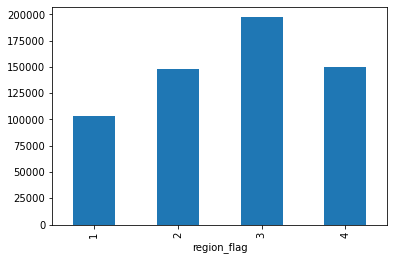

In [21]:
# Create bar charts

reg_high_spenders_bars=reg_high_spenders.plot.bar()

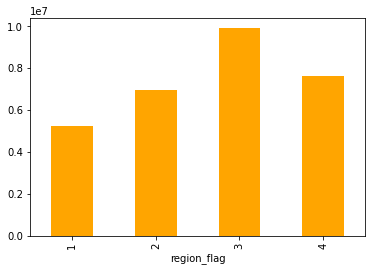

In [22]:
reg_low_spenders_bars=reg_low_spenders.plot.bar(color='orange')

## *** Clear trend: most revenue is generated from region 3 (South Eastern US)

# 4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Aggregate order count for 'order_id' by 'user_id'
# Assign to Series 'user_order_count'

user_order_count=df.groupby('user_id')['order_id'].count()

In [24]:
# Convert Series to Dataframe

user_order_count=pd.DataFrame(user_order_count)

In [25]:
user_order_count.head(3)

,order_id
user_id,
1,54
2,182
3,78


In [26]:
user_order_count.columns

Index(['order_id'], dtype='object')

In [27]:
# Rename 'order_id' column 'order_count'

user_order_count.rename(columns={'order_id':'order_count'},
                        inplace=True)

In [28]:
# Identify users by activity level

user_order_count.loc[user_order_count['order_count'] < 5, 'activity_flag'] = 'Low Activity'

In [29]:
user_order_count.loc[user_order_count['order_count'] >= 5, 'activity_flag'] = 'High Activity'

In [30]:
user_order_count['activity_flag'].value_counts(dropna=False)

High Activity    203516
Low Activity       2692
Name: activity_flag, dtype: int64

In [31]:
# Delete rows where activity_flag is 'High Activity'

user_order_count=user_order_count[user_order_count.activity_flag != 'Low Activity']

In [32]:
# Convert index into list

index_list=user_order_count.index.tolist()

In [33]:
# Before deleting rows, get count of rows with high activity users

df['user_id'].isin(index_list).value_counts()

True     30320103
False        8660
Name: user_id, dtype: int64

In [34]:
# Get count of total rows

df.shape

(30328763, 29)

In [35]:
# Delete low activity customers from original dataframe

df=df[df['user_id'].isin(index_list)]

In [36]:
# Get count of total rows post-deletion

df.shape

(30320103, 29)

In [37]:
# Should equal 0

30328763-30320103-8660

0

In [38]:
# Export data

df.to_pickle('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/02 Data/Prepared Data/05-16-2021 - prods_ords_merge.pkl')

# 5) The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [39]:
# Creating new column 'cust_profile' with 6 new values:
# 'single_adult', 'single_mother', 'single_father', 'college_student', 'nuclear_parent', 'elderly'

df.loc[(df['gender']=='Female') & (df['n_dependants']>=1) & (df['fam_status']=='single'), 'cust_profile'] = 'single mom'

In [40]:
df.loc[(df['gender']=='Male') & (df['n_dependants']>=1) & (df['fam_status']=='single'), 'cust_profile'] = 'single dad'

In [41]:
df.loc[(df['n_dependants']>=1) & (df['fam_status']=='married'), 'cust_profile'] = 'nuclear parent'

In [42]:
df.loc[df['age']>=65, 'cust_profile'] = 'elderly'

In [43]:
df.loc[(df['fam_status']=='single') & (df['n_dependants']==0), 'cust_profile'] = 'single adult'

In [44]:
df.loc[(df['age']>=25) & (df['n_dependants']==0) & (df['fam_status']=='living with parents and siblings'), 'cust_profile'] = 'college student'

In [45]:
df['cust_profile'].value_counts()

nuclear parent    15251759
elderly            8022656
single adult       4983581
Name: cust_profile, dtype: int64

# 6) Create an appropriate visualization to show the distribution of profiles.

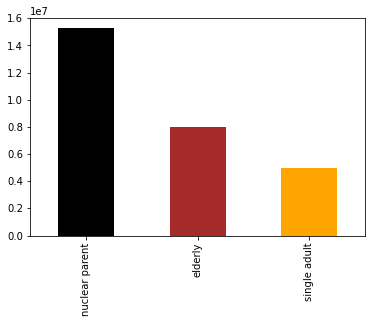

In [46]:
df['cust_profile'].value_counts().plot.bar(color=['black','brown','orange','yellow'])

# 7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [47]:
# How often do they ('cust_profile') use Instacart (days_since_prior_order) & how much they spend (prices):
# By mean, min, max

usage_frequency_crosstab=pd.crosstab(df['cust_profile'],
                                     df['days_since_prior_order'],
                                     dropna=False)

In [48]:
usage_frequency_crosstab=usage_frequency_crosstab.T # Reconfigure code to long-format

In [49]:
usage_frequency_crosstab.to_clipboard() # Send to clipboard

In [50]:
# Results from Excel

usage_frequency=pd.read_csv(r'/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Customer Profile Frequency.csv')

In [51]:
usage_frequency

,FREQUENCY,elderly,nuclear parent,single adult,single mom
0,min,46566.0000,8.855400e+04,28393.0000,5740.00000
1,max,924704.0000,1.742243e+06,571012.0000,113587.00000
2,mean,258795.3548,4.919922e+05,160760.6774,32875.16129


In [52]:
expenditure_crosstab=pd.crosstab(df['prices'],
                                df['cust_profile'],
                                dropna=False)

In [53]:
expenditure_crosstab.to_clipboard() # Send to clipboard

In [54]:
# Results from Excel

expenditure=pd.read_csv(r'/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Customer Profile Expenditure.csv')

In [55]:
expenditure

,EXPENDITURE,elderly,nuclear parent,single adult,single mom
0,min,0.00000,6.00000,0.00000,0.000000
1,max,154319.00000,294258.00000,95863.00000,20146.000000
2,mean,33151.47107,63023.79752,20593.30992,4211.280992


# 8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [56]:
# Create crosstab for 'region_flag' & 'cust_profile'

profiles_regions_crosstab=pd.crosstab(df['region_flag'],
                             df['cust_profile'],
                             dropna=False)

In [57]:
profiles_regions_crosstab.to_clipboard() # Send to clipboard

In [58]:
# Import as .csv

profiles_regions=pd.read_csv(r'/Users/sjpeterson76/Desktop/05-21-2021 TASK 4.10/profiles_regions_crosstab.csv')

In [59]:
profiles_regions

,region_flag,elderly,nuclear parent,single adult,single mom
0,1,1455278,2693209,856224,165893
1,2,1860911,3579082,1178927,235959
2,3,2652811,5066611,1666333,363268
3,4,2053656,3912857,1282097,254010


In [60]:
# Create crosstab for 'department_id' & 'cust_profile'

profiles_department_crosstab=pd.crosstab(df['department_id'],
                             df['cust_profile'],
                             dropna=False)

In [61]:
profiles_department_crosstab.to_clipboard() # Send to clipboard

In [62]:
# Import as .csv

profiles_department=pd.read_csv(r'/Users/sjpeterson76/Desktop/05-21-2021 TASK 4.10/profiles_department_crosstab.csv')

In [63]:
profiles_department

,department_id,elderly,nuclear parent,single adult,single mom
0,1,551982,1043798,337337,70084
1,2,8815,16870,5762,1193
2,3,289328,550643,181522,37314
3,4,2358425,4468156,1466084,297332
4,5,35680,69950,24404,5322
5,6,65733,125627,41522,8458
6,7,669919,1265080,415782,83777
7,8,24678,44806,15046,3026
8,9,212835,406126,131221,27446
9,10,8776,16676,5200,1031


# 9) Produce suitable charts to illustrate your results and export them in your project folder.

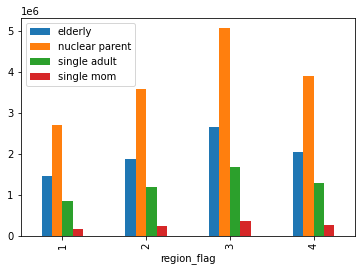

In [64]:
# Create bar chart for 'profiles_regions' to demonstrate variation by customer profile

profiles_regions_bars=profiles_regions.plot(x='region_flag',
                                            y=['elderly',
                                               'nuclear parent',
                                               'single adult',
                                               'single mom'],
                                            kind='bar')

### - Region-wide: nuclear parents order the most, single moms order the least
### - Also worth noting- region 3 submits the most orders, region 1 submits the least

In [65]:
# Export chart

profiles_regions_bars.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/01 Project Management/profiles_regions_bars1.png')

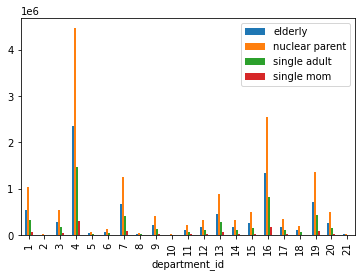

In [66]:
# Create bar chart for 'profiles_department' to demonstrate variation by customer profile

profiles_department_bars=profiles_department.plot(x='department_id',
                                            y=['elderly',
                                               'nuclear parent',
                                               'single adult',
                                               'single mom'],
                                            kind='bar')

In [67]:
# Create subset for 'profiles_department' to single-out produce (4) and bulk (10)

pd_subset=profiles_department.loc[[3,9]]

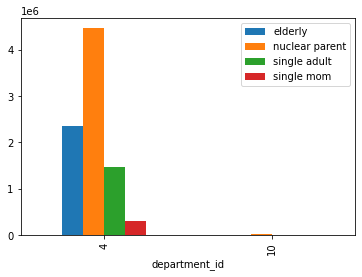

In [68]:
# Create more legible chart

profiles_department_bars_2=pd_subset.plot(x='department_id',
                                            y=['elderly',
                                               'nuclear parent',
                                               'single adult',
                                               'single mom'],
                                            kind='bar')

### - Across all departments: nuclear parents pay the most, single moms pay the least
### - Across all profiles: produce (4) and bulk (10) have the most and least revenue, respectively.

In [69]:
# Export chart

profiles_department_bars.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/01 Project Management/profiles_department_bars.png')

In [70]:
# Export chart

profiles_department_bars_2.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/01 Project Management/profiles_department_bars_2.png')

# 10) Tidy up your script, export your final data set, and save your notebook.

In [72]:
# Export dataframe

df.to_pickle('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/01 Project Management/05-22-2021 - Final Dataframe')